In [1]:
#importing the all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#loading the dataset

data=pd.read_csv('bank-additional-full.csv',sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.rename(columns={'y':'sub_deposit'}, inplace=True)

In [5]:
#shape of the dataset

data.shape

(41188, 21)

In [6]:
#info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#checking for the null values

data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
sub_deposit       0
dtype: int64

In [9]:
#checking for the duplicate values

data.duplicated().sum()

12

In [10]:
#removing the duplicate values

data.drop_duplicates(inplace=True)

In [11]:
#checking whether rows are removed or not

data.duplicated().sum()

0

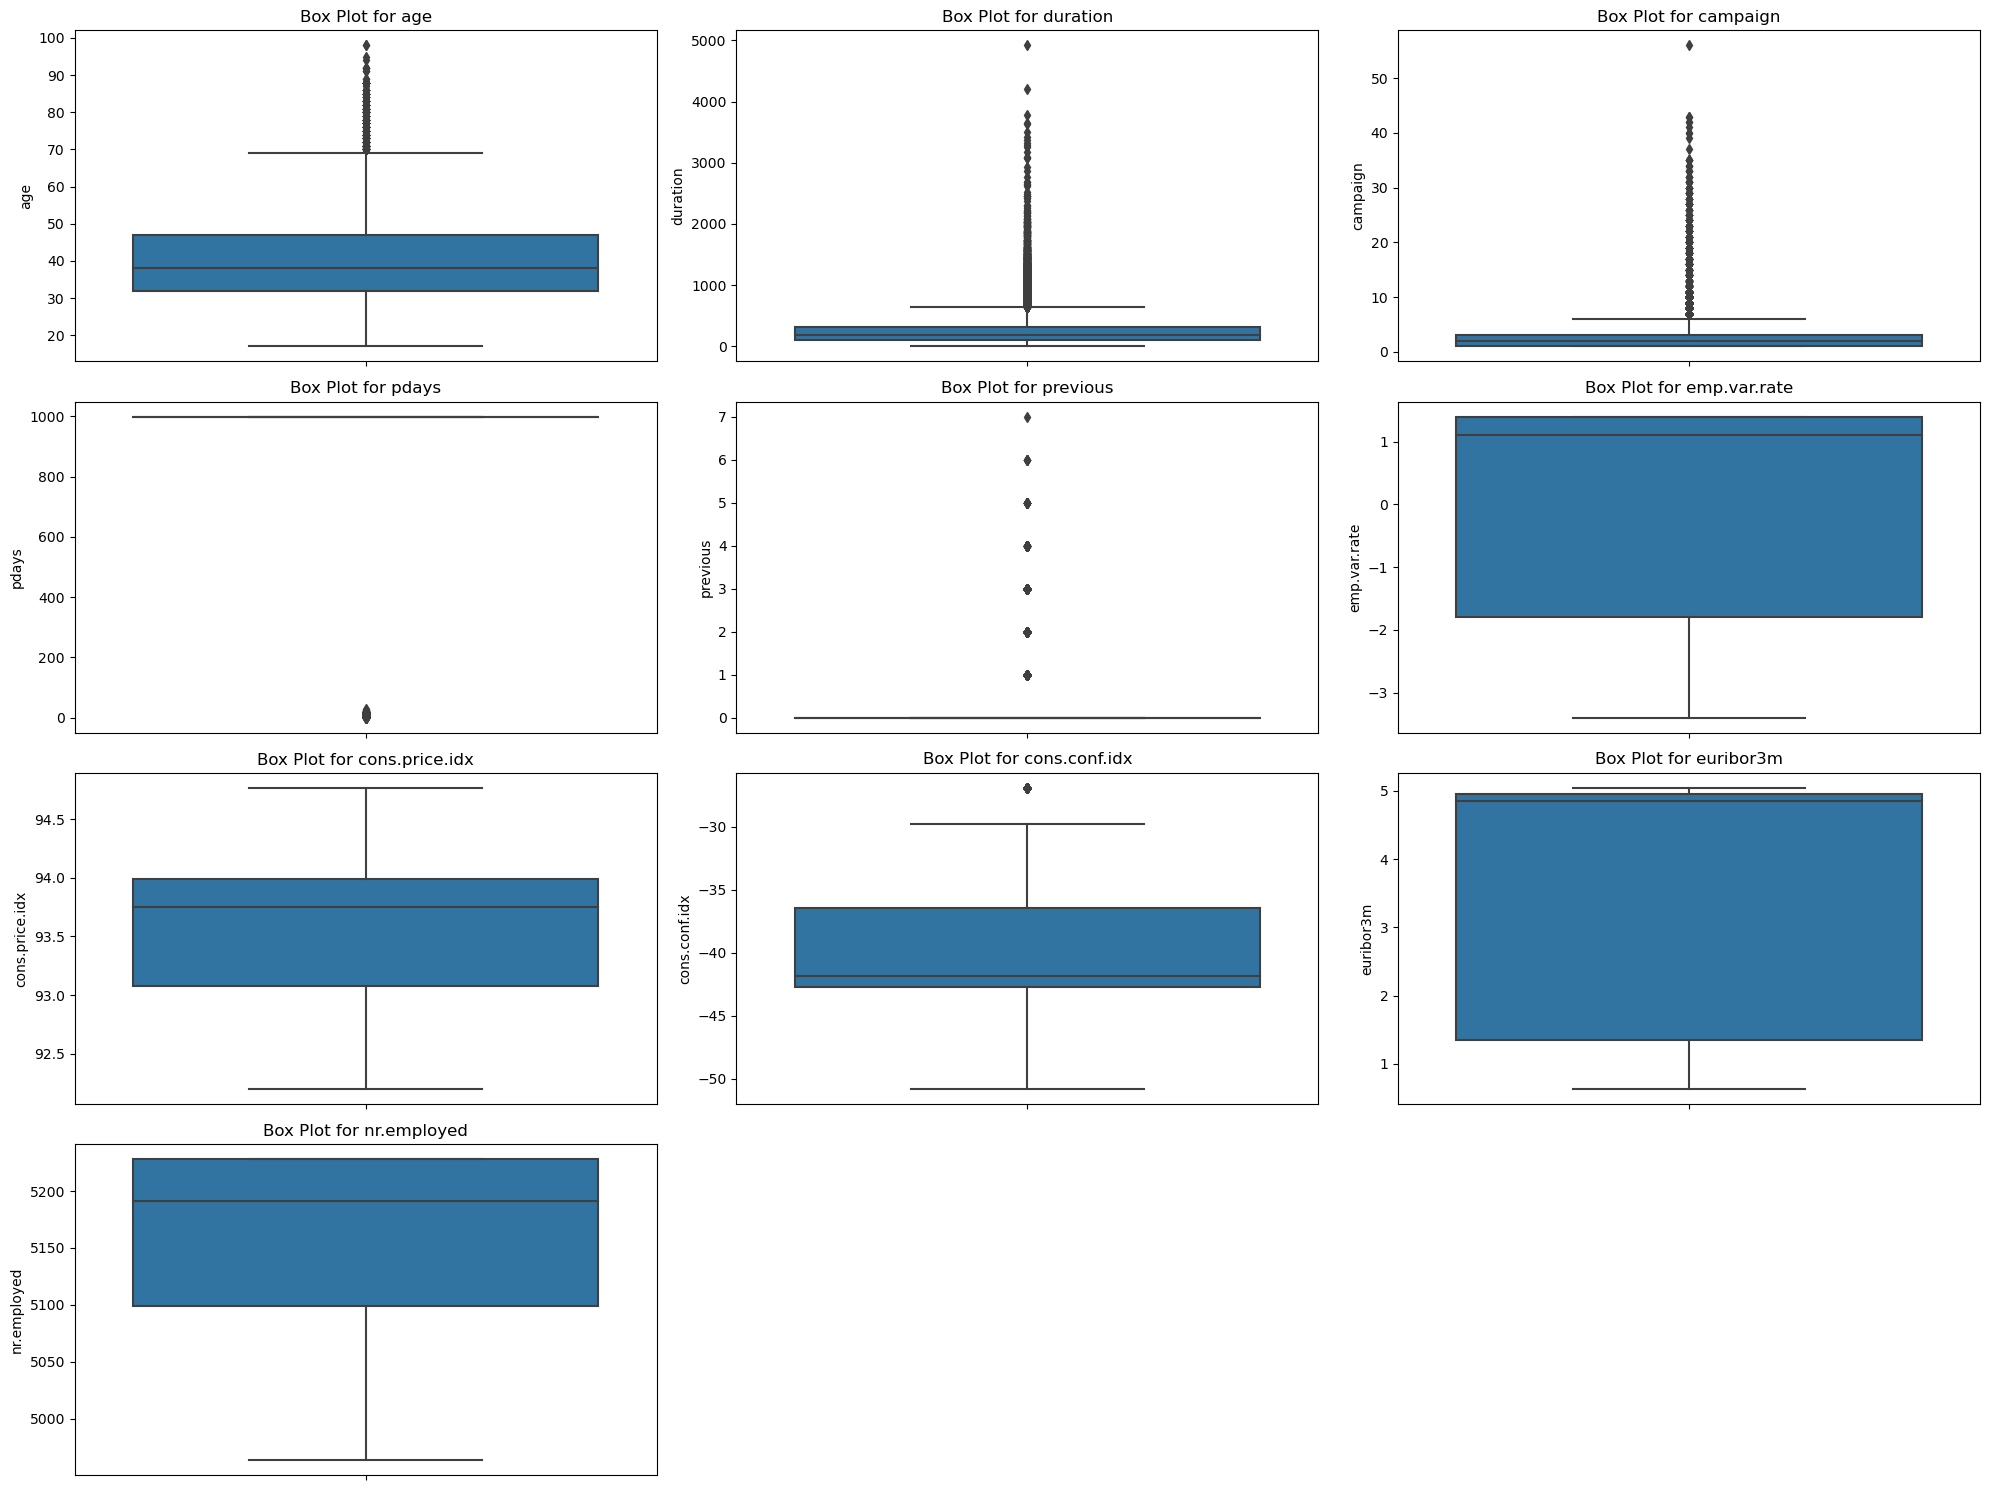

In [14]:
#plotting box plot for all numerical columns 

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

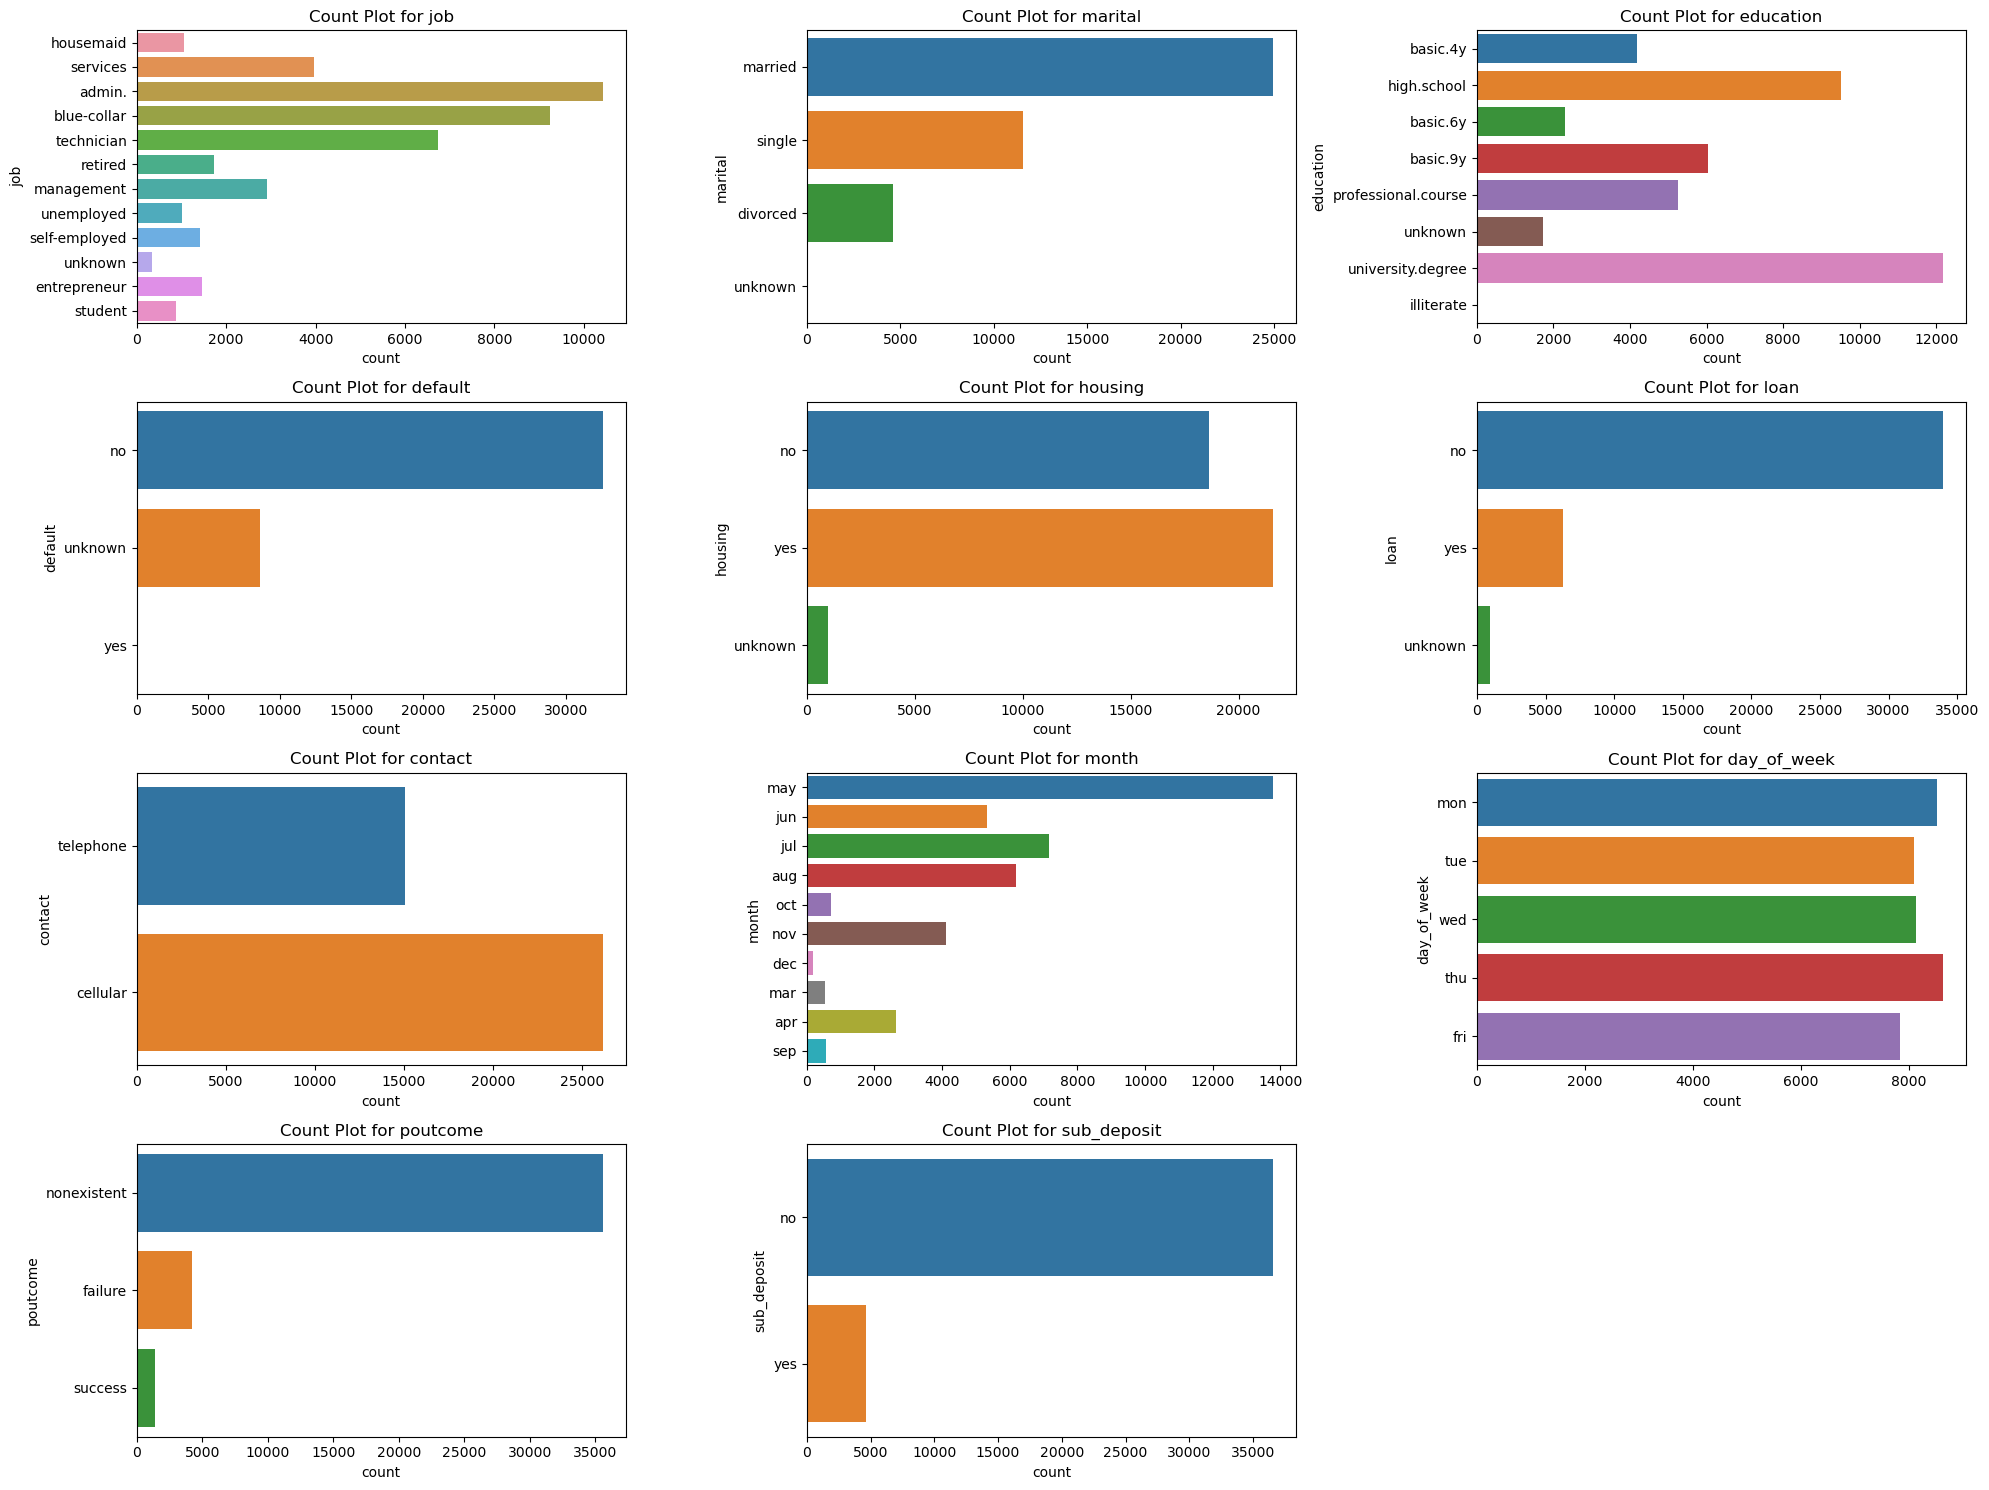

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Ploting count plots for all categorical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)
    sns.countplot(y=col, data=data)
    plt.title(f'Count Plot for {col}')

plt.tight_layout()
plt.show()

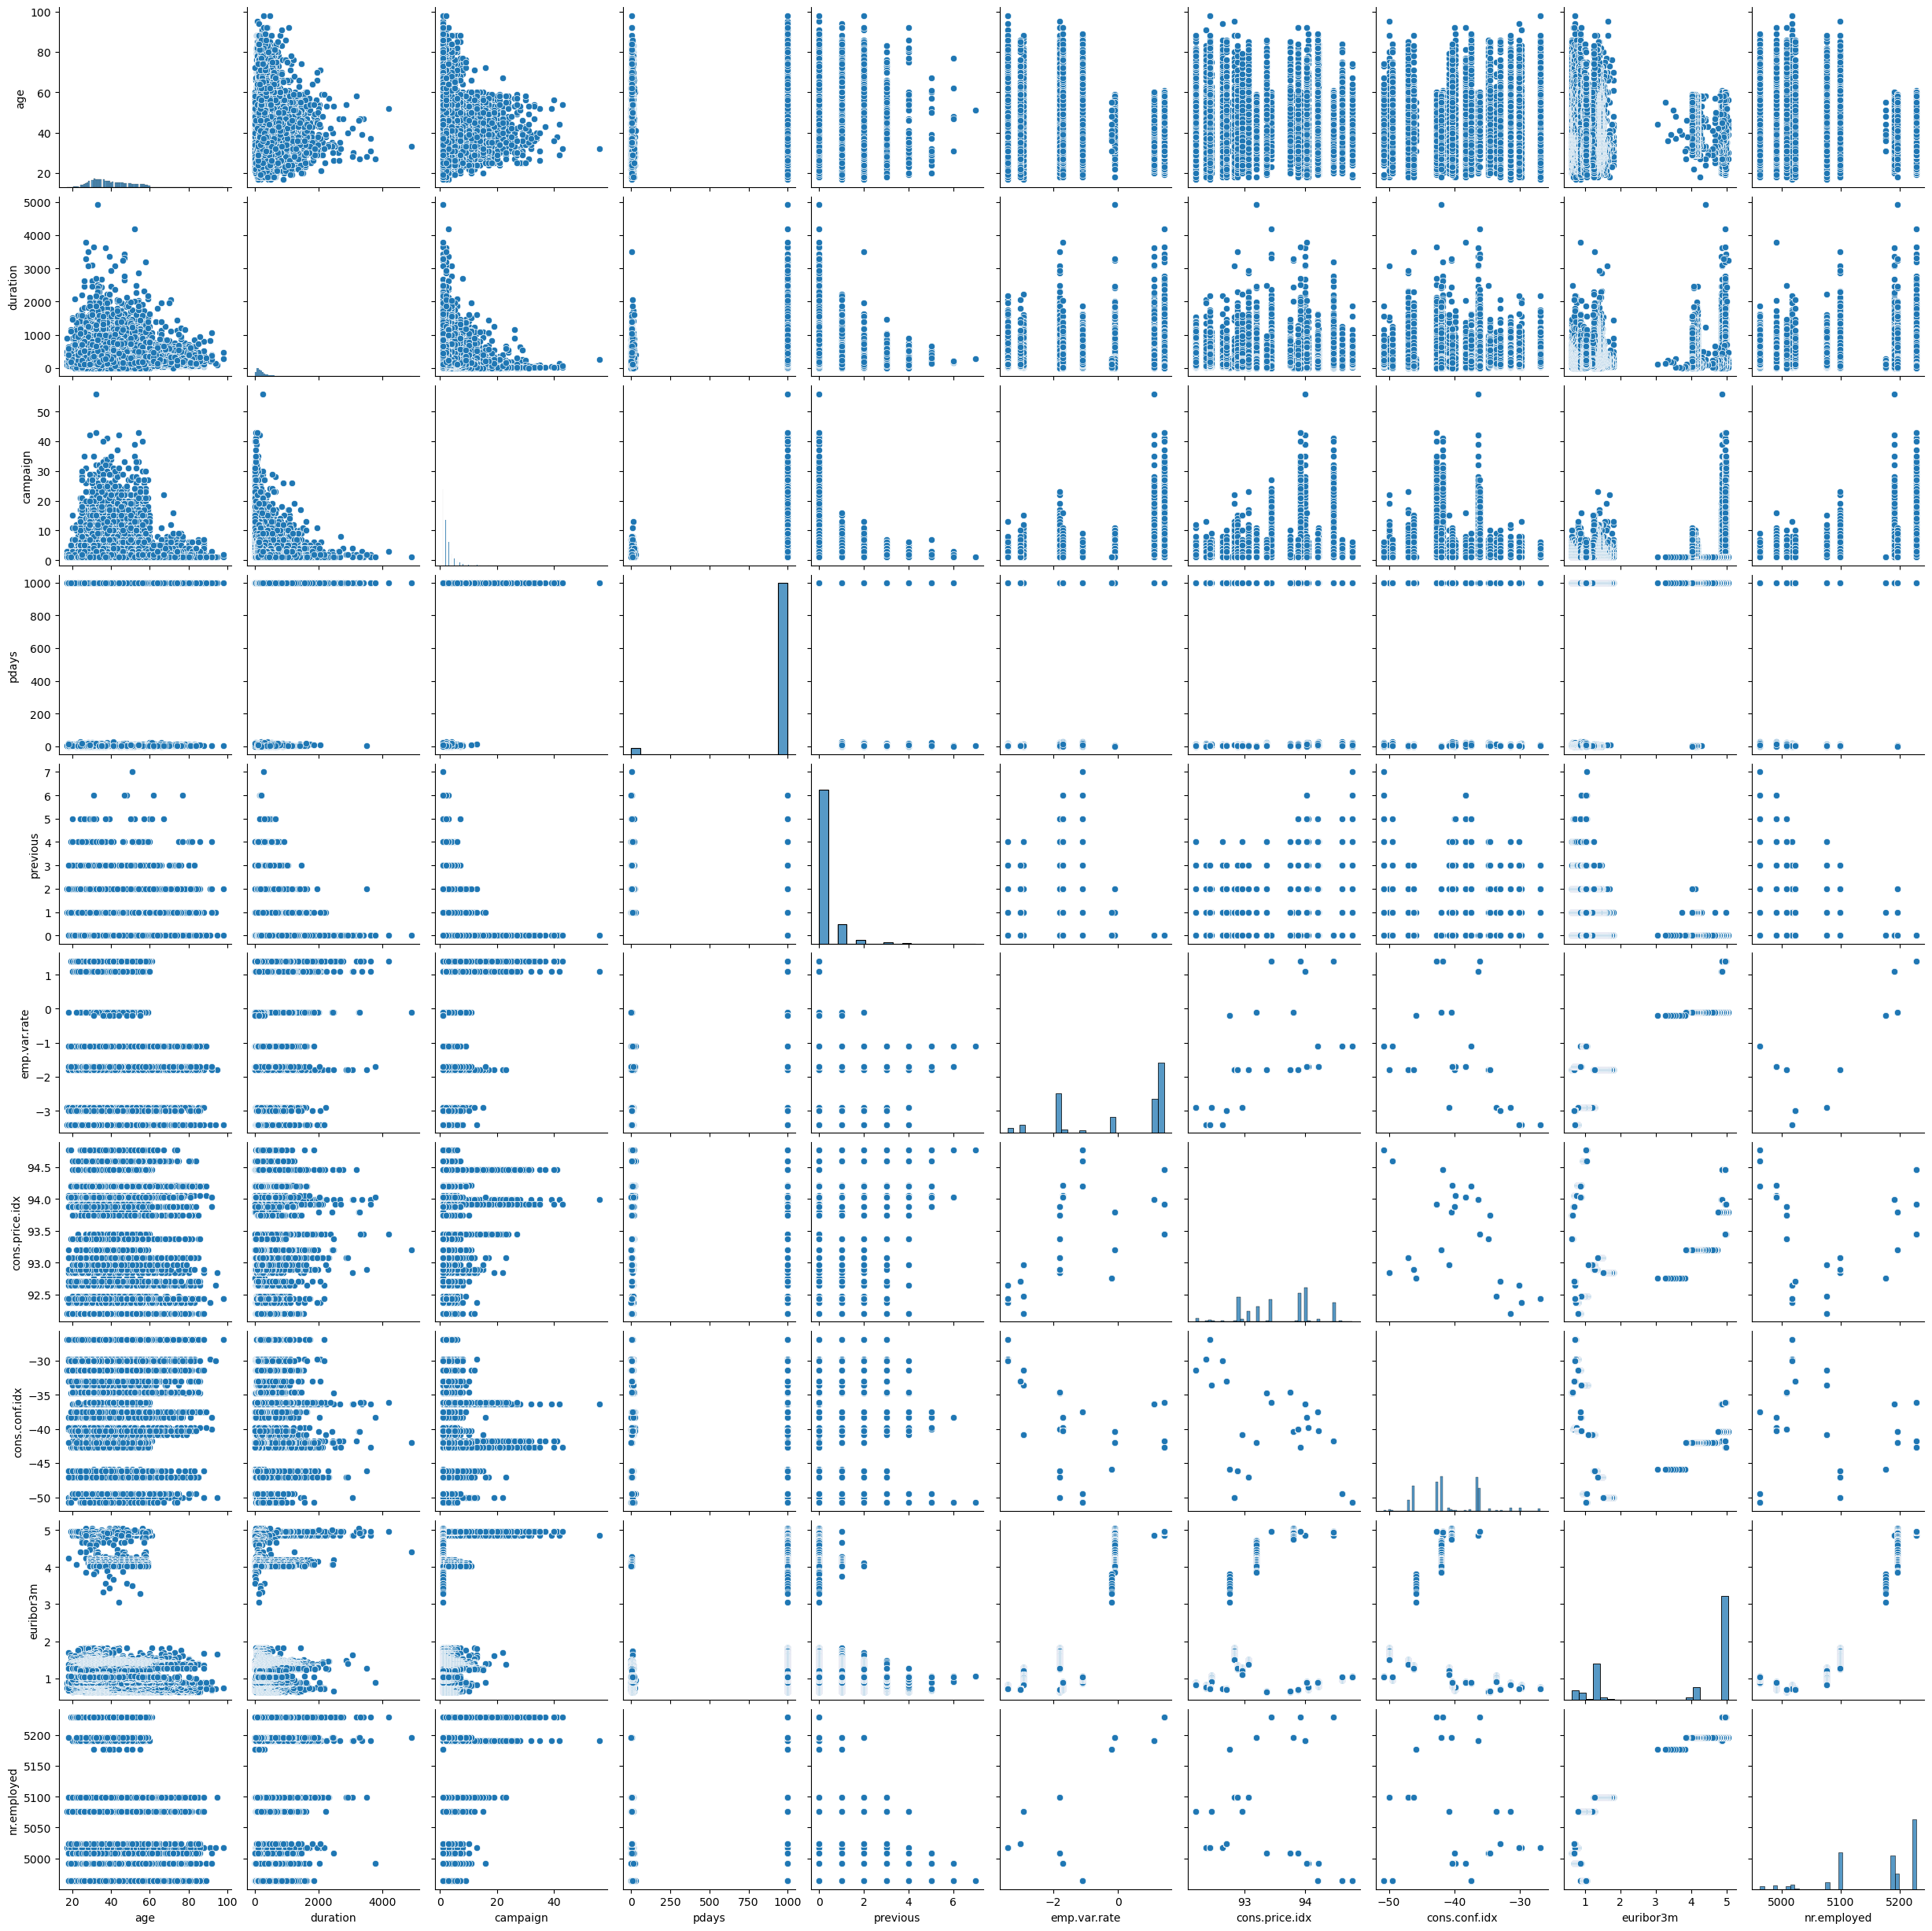

In [16]:
#checking for the outliers
# Plot scatter plots for pairs of numerical columns
sns.pairplot(data[numerical_cols])
plt.show()

In [19]:
#outlier treatment

columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

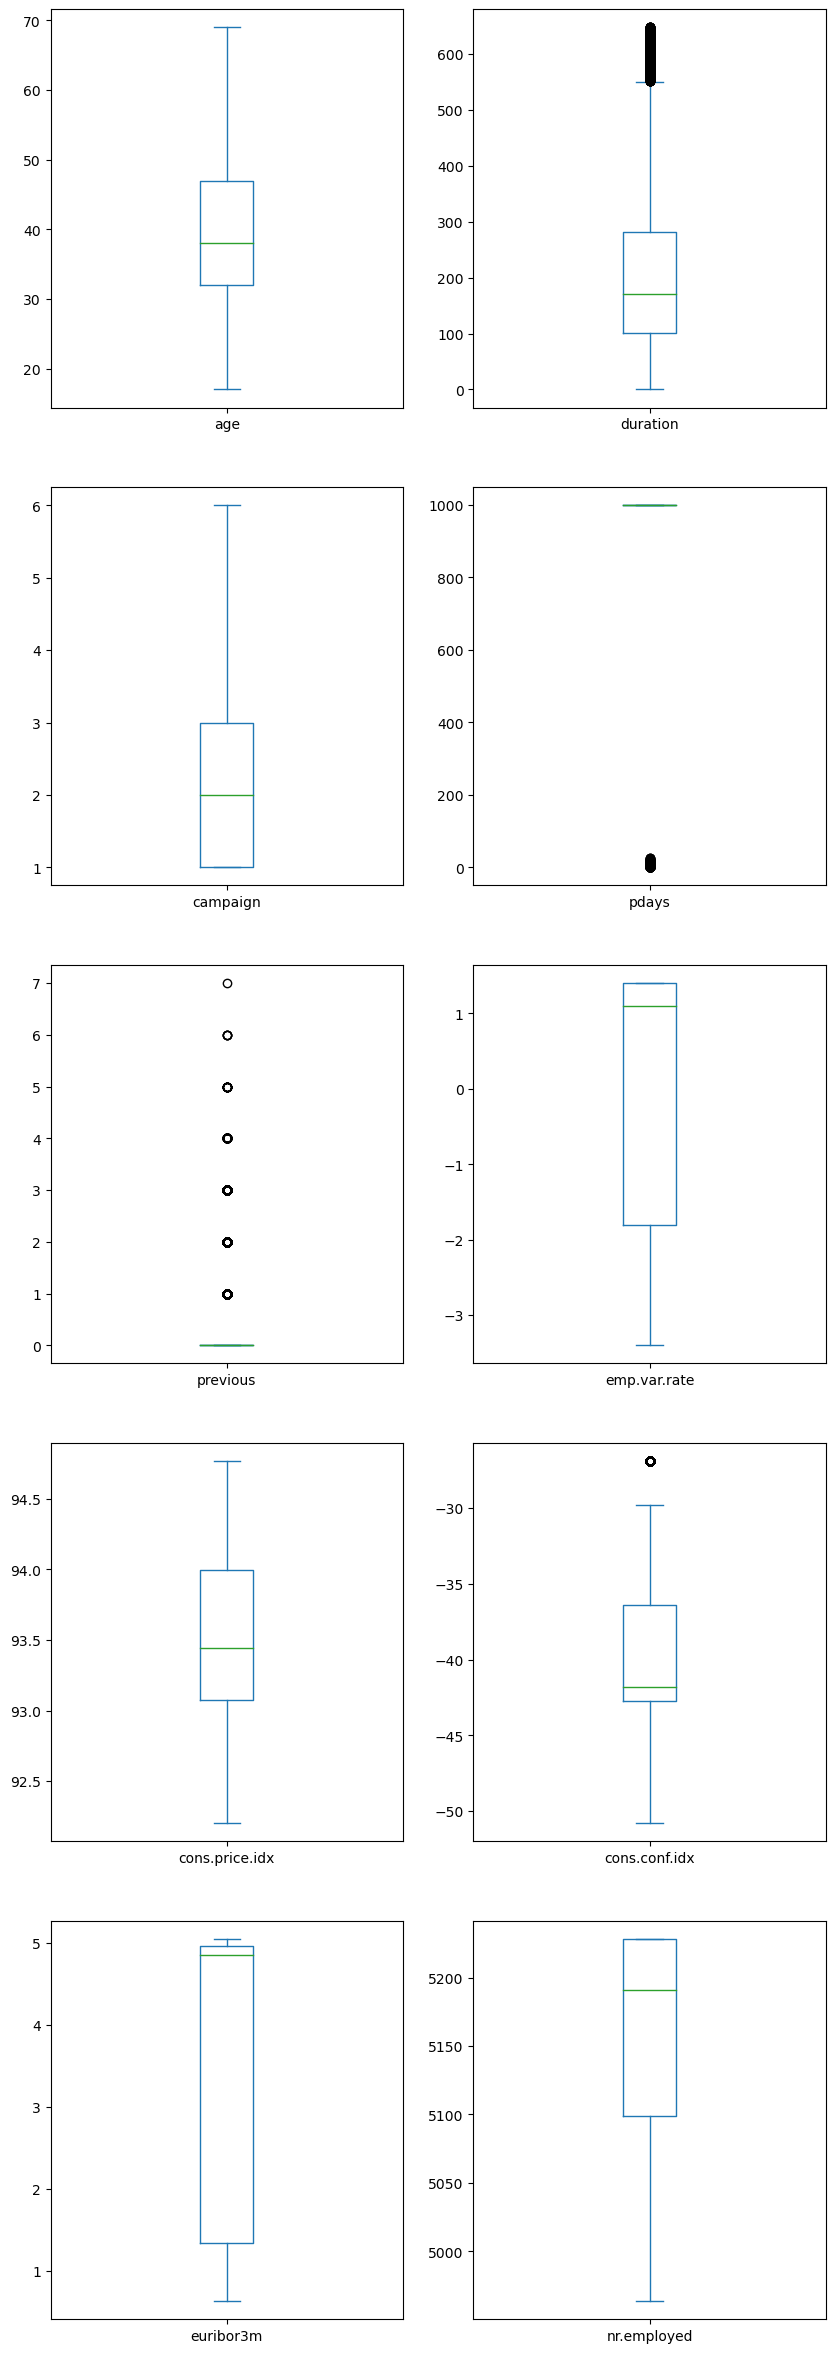

In [20]:
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

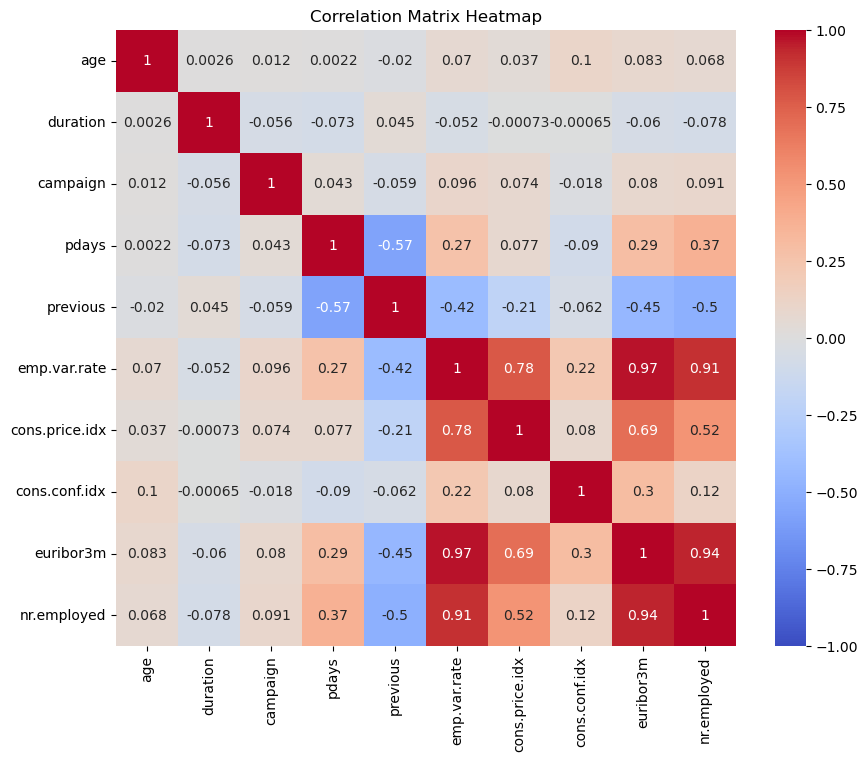

In [23]:
#checking for correlation using heatmap

# Select only the numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [25]:
# copy the original dataframe

data1=data.copy()

# Removing high correlated columns from the dataset
data1.drop(high_corr_cols, inplace=True, axis=1)
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'sub_deposit'],
      dtype='object')

In [27]:
#converting all the categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = data1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,sub_deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,281,0,26,0,1,25,0,1
41182,12,10,2,0,0,2,0,0,7,0,112,0,9,1,2,25,0,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0


In [30]:
df_encoded['sub_deposit'].value_counts(normalize=True)*100

0    91.887482
1     8.112518
Name: sub_deposit, dtype: float64

In [31]:
## independent variables
x = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1]  

In [32]:
#splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24885, 17)
(10665, 17)
(24885,)
(10665,)


In [34]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [35]:
#evaluating training and testing accuracy

print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9369901547116737
Testing accuracy: 0.93314580403188


In [36]:
y_pred=dc.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.93314580403188


In [38]:
print(confusion_matrix(y_test,y_pred))

[[9599  214]
 [ 499  353]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9813
           1       0.62      0.41      0.50       852

    accuracy                           0.93     10665
   macro avg       0.79      0.70      0.73     10665
weighted avg       0.92      0.93      0.93     10665



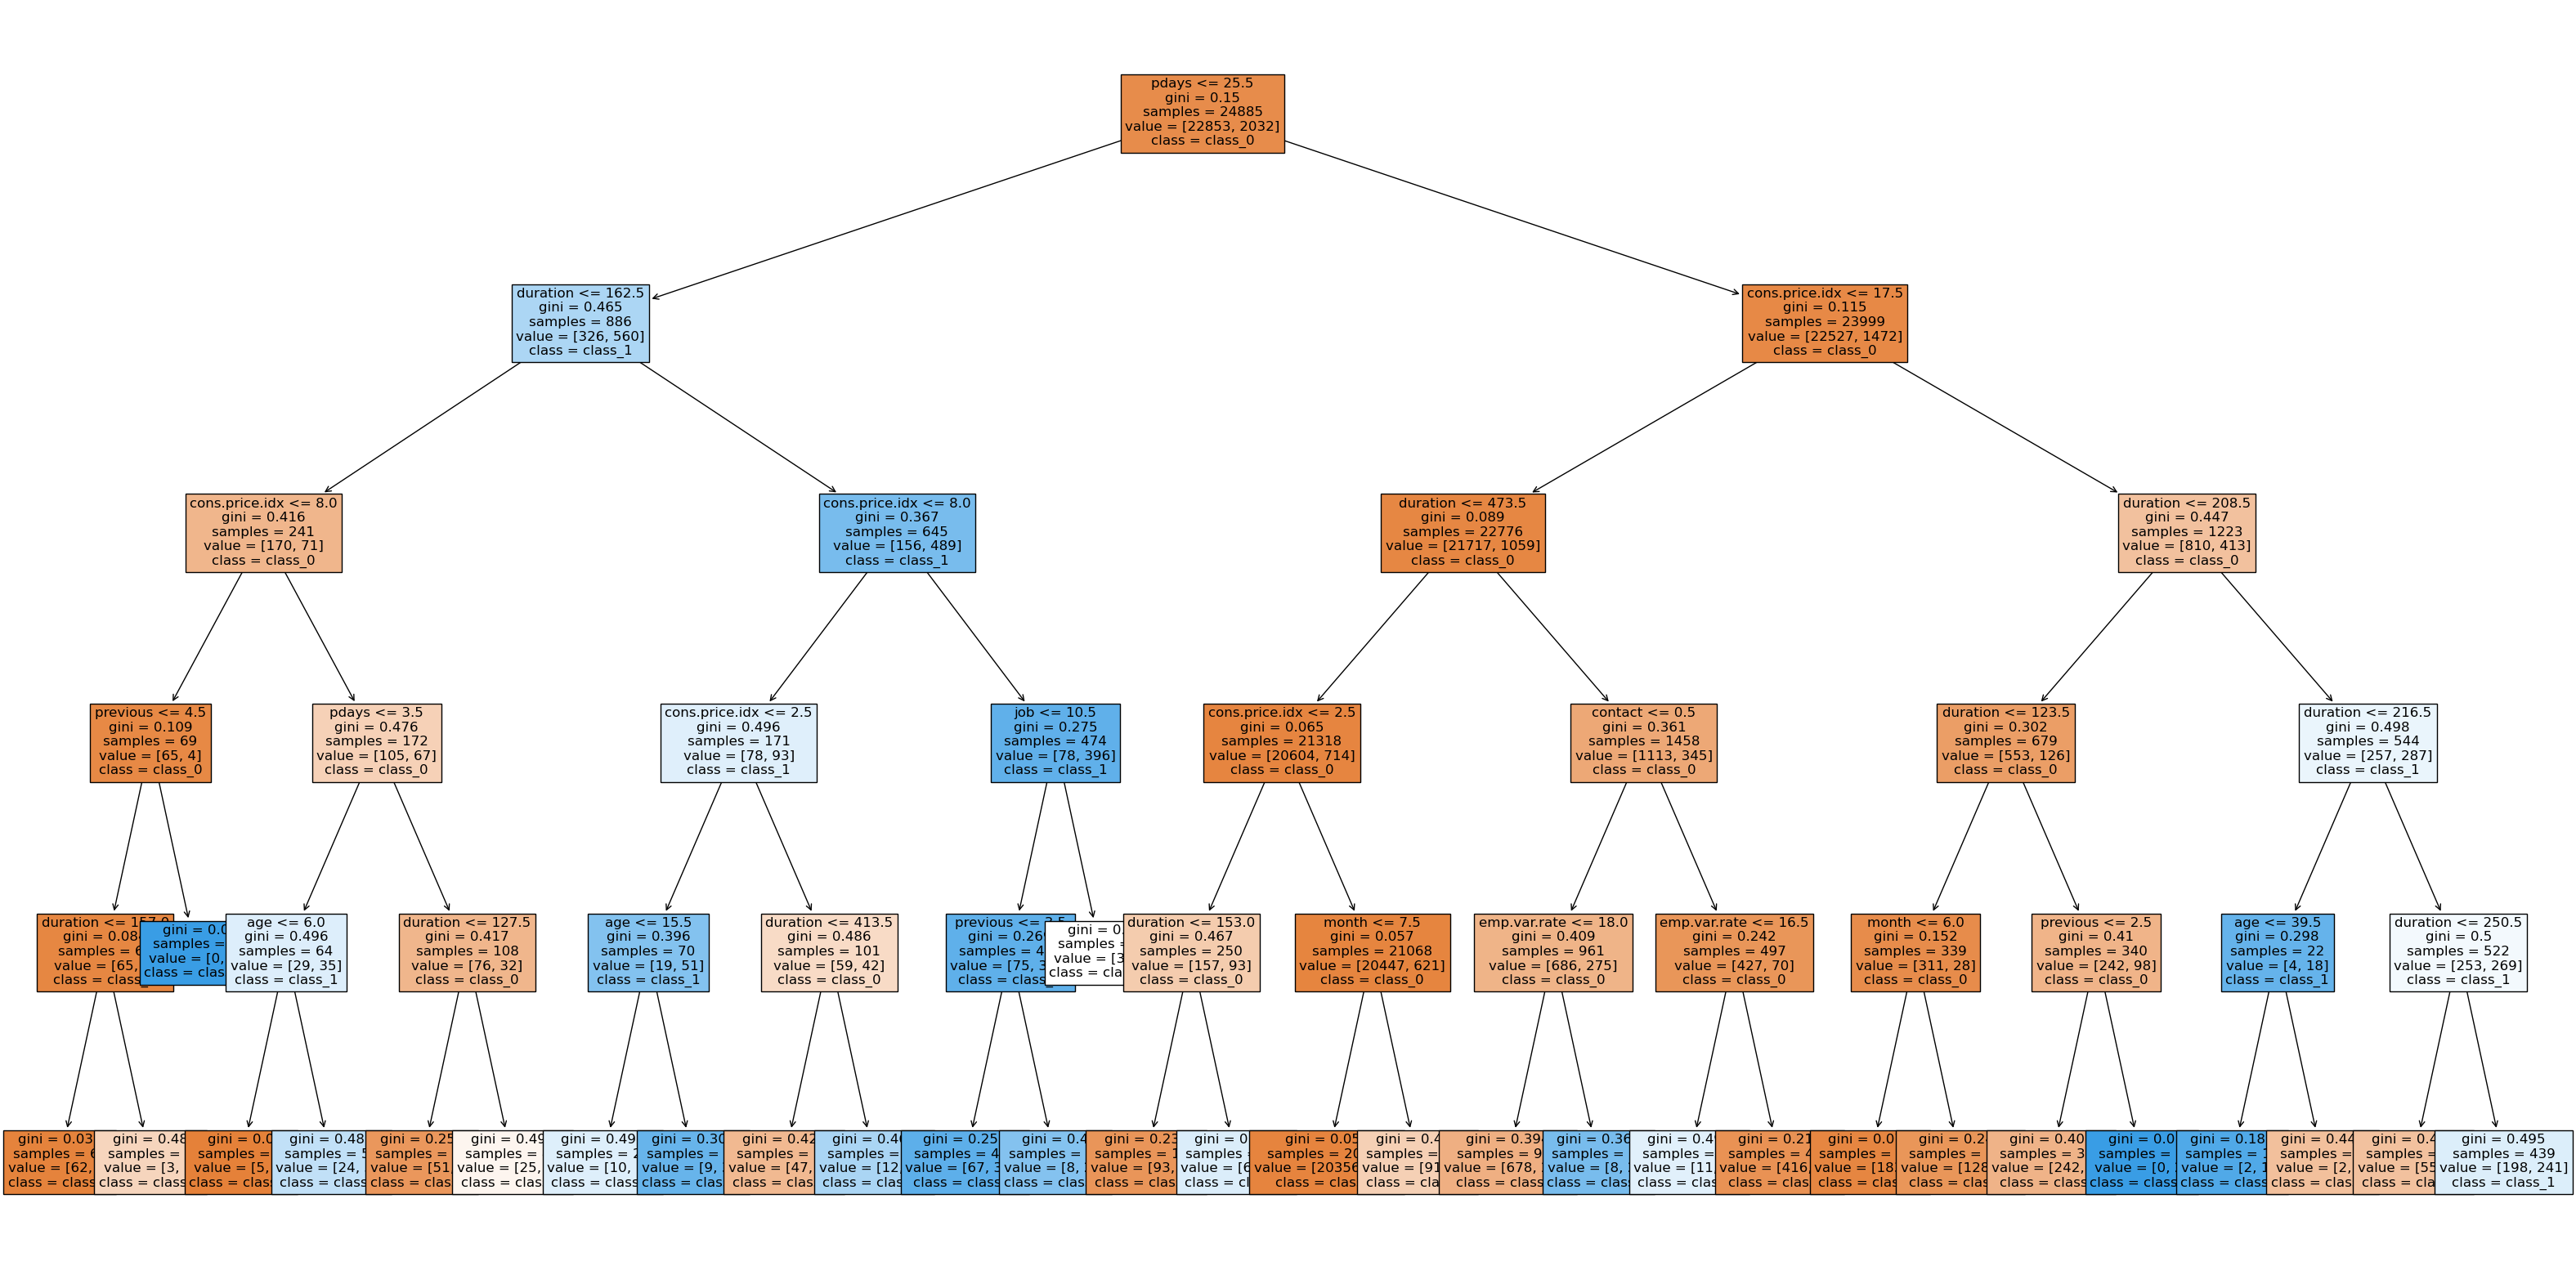

In [41]:
#plotting the decision tree

from sklearn.tree import plot_tree
feature_names=data.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()